# Libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns; sns.set(style="whitegrid")
import statsmodels
import statsmodels.api as sm
import pandas_datareader as pdr
from datetime import datetime
from statsmodels.tsa.stattools import coint, adfuller

## Normal And Lognormal Distribution for Stock Prices


Stock Prices can be modeled using the Lognormal Distribution as long as we 
assume the growth factor to be be distributed normally.
<br>
This also alleviates the problem caused by normal distributions having a negative side as stock prices cannot have negative values.
<br>
Returns are usually assumed to be originating from Normal distribution so our modelling provides us with unique advantages.

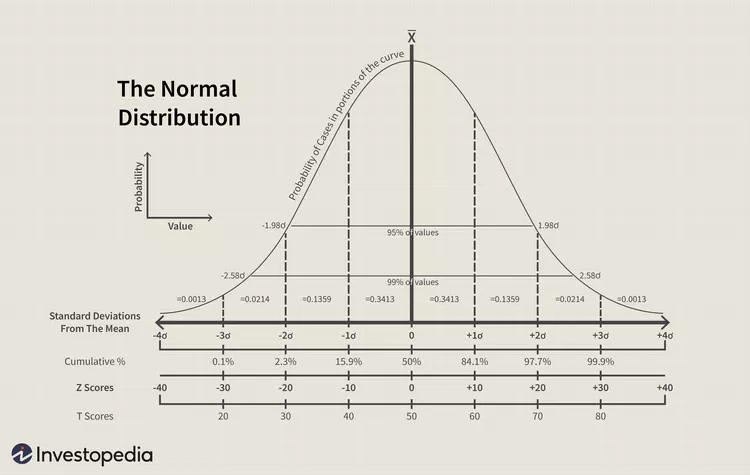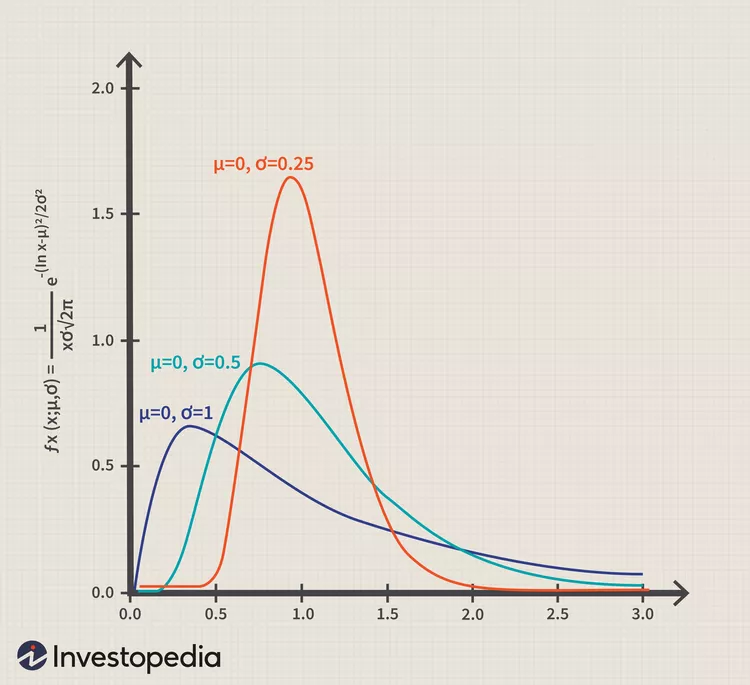

##Random Walk Hypothesis

According to the Random Walk Hypothesis, stock prices evolve according to a geometric random walk. That is,

\begin{align}
  S_t = S_{t-1}(1 + α)
\end{align}

where,
<br>
$S_t$ is the price of a stock at some time $t$ with $t$ being in a the form of some discrete time steps.
<br> 
$α$ is a random variable satisfying $α \sim N(μ, σ^2)$
<br>

This implication of this hypothesis is that stock prices cannot be predicted. To explain this random walk better, we have simulated a geometric random walk in the following section.

Here, error_term corresponds to $α$ which satisfies $α ∼ N(0.05, 0.1)$.
<br>
The walk is initialized with $S_0 = 1$

##Simulating Geometric Random Walk 


In [ ]:
S = np.zeros(100)
S[0] = 1
error_term = np.random.randn(100)* 0.1 + 0.05
for i in range(1, 100):
  S[i] = S[i-1] * (1 + error_term[i])

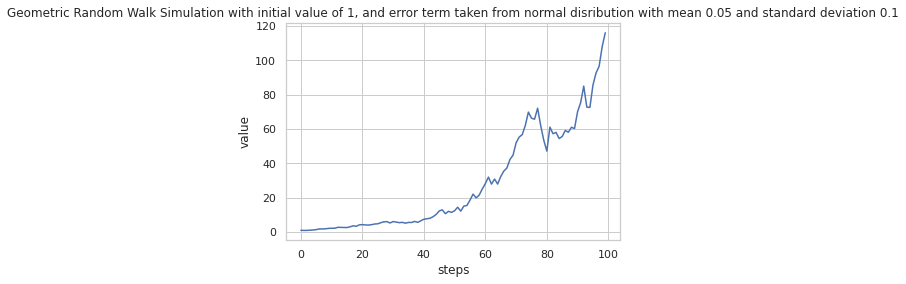

In [ ]:
timestamps = (np.zeros(100).astype(int))
for i in range(100):
  timestamps[i] = i
random_walk_graph = sns.lineplot(x=timestamps, y=S)
random_walk_graph.set(xlabel='steps', ylabel='value')
plt.title("Geometric Random Walk Simulation with initial value of 1, and error term taken from normal disribution with mean 0.05 and standard deviation 0.1")
plt.show()

## Data importing and processing

In [ ]:
symbols =  ['AXISBANK.NS' , 'BAJAJFINSV.NS' ,'BAJAJHLDNG.NS','BAJFINANCE.NS' , 'BANKBARODA.NS','HDFC.NS','HDFCBANK.NS','ICICIBANK.NS','INDUSINDBK.NS','KOTAKBANK.NS','PEL.NS','PFC.NS','PNB.NS','SBIN.NS']
asset_data =  yf.download(symbols, start="2012-03-20" ,end= "2017-03-20")['Adj Close']

asset_data.keys()

[*********************100%***********************]  14 of 14 completed


Index(['AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BAJFINANCE.NS',
       'BANKBARODA.NS', 'HDFC.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'KOTAKBANK.NS', 'PEL.NS', 'PFC.NS', 'PNB.NS',
       'SBIN.NS'],
      dtype='object')

In [ ]:
asset_data.head()

,AXISBANK.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,BAJFINANCE.NS,BANKBARODA.NS,HDFC.NS,HDFCBANK.NS,ICICIBANK.NS,INDUSINDBK.NS,KOTAKBANK.NS,PEL.NS,PFC.NS,PNB.NS,SBIN.NS
Date,,,,,,,,,,,,,,
2012-03-20,221.233215,59.313595,644.318298,72.966103,136.869644,558.175354,233.842804,143.148270,296.223663,267.517059,348.749084,50.169903,168.485794,195.678909
2012-03-21,229.140091,59.503159,640.184753,74.985901,140.911987,566.664612,238.585327,147.157867,301.369995,270.520935,350.901367,52.994080,171.457718,199.749329
2012-03-22,219.396408,58.443542,639.985962,75.170341,135.729492,559.618591,233.310684,141.738235,293.013000,257.015961,351.161133,50.088428,166.226059,193.285873
2012-03-23,219.927856,59.230961,647.378723,75.105797,138.743973,560.764587,237.798767,143.455505,294.287781,260.963196,348.118195,50.264961,167.316345,193.836060
2012-03-26,209.820526,58.215096,640.145020,74.709206,136.385956,552.869446,236.734604,137.460785,289.755249,263.718811,341.512878,49.219460,160.264618,189.425720


# Cointegration


### Cointegration is a statistical method used to test the correlation between two or more non-stationary time series in the long run or for a specified period.

## Function for finding cointegration of two time series

In [ ]:

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n,n))
    pvalue_matrix = np.ones((n,n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(n):
            if i == j:
               continue
            s1 = data[keys[i]]
            s2 = data[keys[j]]
            result = coint(s1,s2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i,j] = score
            pvalue_matrix[i,j] = pvalue
            if (pvalue < 0.05 and pvalue!=0 and keys[i]!=keys[j]):                #cutoff
                pairs.append((pvalue, (keys[i], keys[j])))
    return score_matrix, pvalue_matrix, pairs


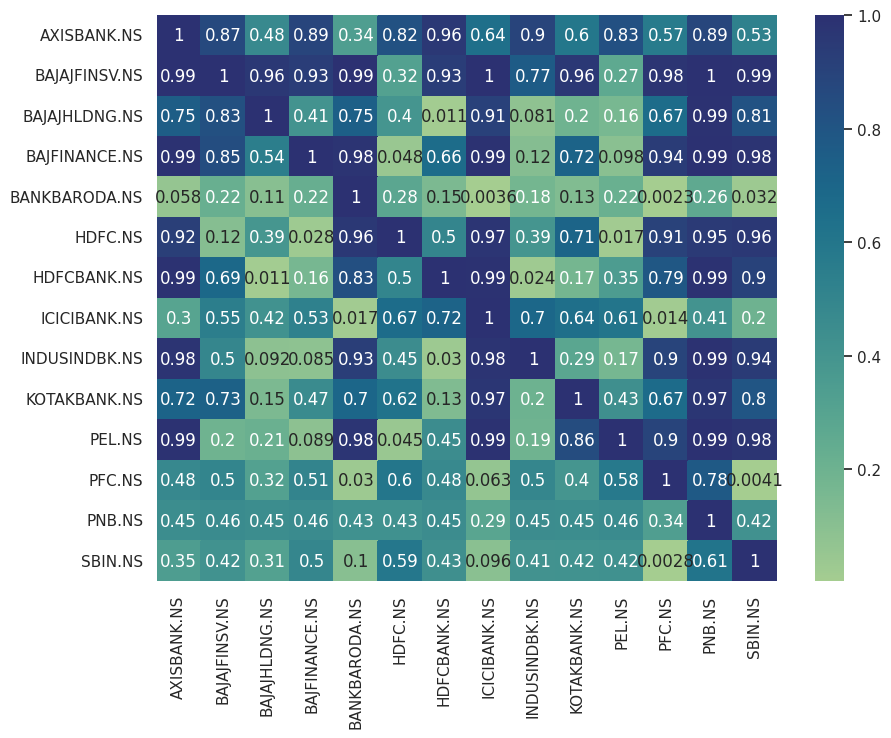

In [ ]:
scores, pvalues, pairs = find_cointegrated_pairs(asset_data)
from matplotlib.pyplot import figure
figure(figsize=(10, 7.5), dpi=100)
sns.heatmap(pvalues, xticklabels = asset_data.columns, yticklabels = asset_data.columns,
        cmap = 'crest',  annot = True)


Identifying the pairs of stocks having a co-integrating relationship, i.e, they have p-values less than the defined cutoff of 0.05. p-value is a measure of how strong the relationship between two series is. The lower the pvalue the better generally.

In [ ]:
pairs

[(0.010966848895415472, ('BAJAJHLDNG.NS', 'HDFCBANK.NS')),
 (0.04804591321520773, ('BAJFINANCE.NS', 'HDFC.NS')),
 (0.00359974100820799, ('BANKBARODA.NS', 'ICICIBANK.NS')),
 (0.0023112934783160884, ('BANKBARODA.NS', 'PFC.NS')),
 (0.03230422759992858, ('BANKBARODA.NS', 'SBIN.NS')),
 (0.028424199218378486, ('HDFC.NS', 'BAJFINANCE.NS')),
 (0.017351659963185134, ('HDFC.NS', 'PEL.NS')),
 (0.01077232828716199, ('HDFCBANK.NS', 'BAJAJHLDNG.NS')),
 (0.024201566525215334, ('HDFCBANK.NS', 'INDUSINDBK.NS')),
 (0.01718176688814034, ('ICICIBANK.NS', 'BANKBARODA.NS')),
 (0.014297710599519523, ('ICICIBANK.NS', 'PFC.NS')),
 (0.029744183415609127, ('INDUSINDBK.NS', 'HDFCBANK.NS')),
 (0.0453974136618473, ('PEL.NS', 'HDFC.NS')),
 (0.029614678614128833, ('PFC.NS', 'BANKBARODA.NS')),
 (0.004093980840363093, ('PFC.NS', 'SBIN.NS')),
 (0.0028155414619155422, ('SBIN.NS', 'PFC.NS'))]

In [ ]:
min(pairs)

(0.0023112934783160884, ('BANKBARODA.NS', 'PFC.NS'))

[*********************100%***********************]  14 of 14 completed


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


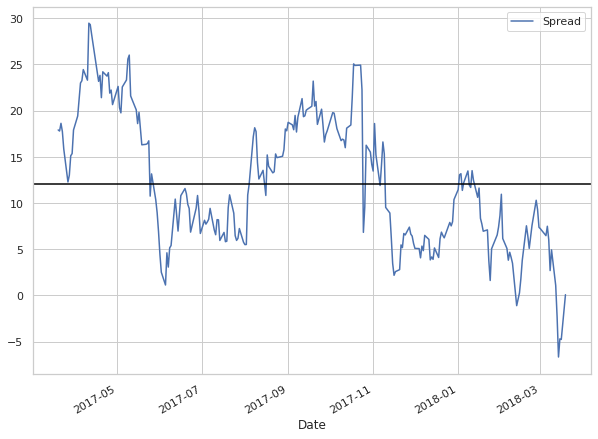

In [ ]:
symbols_pairs =  ['BANKBARODA.NS' , 'PFC.NS']
asset_pairs =  yf.download(symbols, start="2017-03-20" ,end= "2018-03-20")['Adj Close']

S1=asset_pairs['BANKBARODA.NS']
S2=asset_pairs['PFC.NS']

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['BANKBARODA.NS']
b = results.params['BANKBARODA.NS']

spread = S2 - b * S1
spread.plot(figsize=(10, 7.5))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. Z-scores also make it possible to adapt scores from data sets having a very different range of values to make scores that can be compared to one another more accurately.

Here, we have used Z-score to perform normalization on the spread of the securities

\begin{align}
  z = \dfrac{x - μ}{σ}
\end{align}

where,<br>
$x$ is a series<br>
$μ$ is the series mean<br>
$σ$ is the series standard deviation<br>
$z$ is the z-score


In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

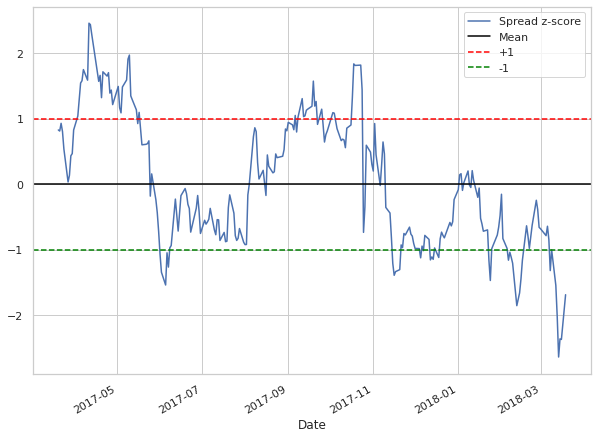

In [ ]:
zscore(spread).plot(figsize=(10, 7.5))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

# Backtesting


Trading signal generation

In [ ]:
#Dataframe for trading signals
def signal_pairs(x,y):
  signals = pd.DataFrame()
  signals['asset1'] = x 
  signals['asset2'] = y

  #Calculating Z score of spread and defining upper and lower threshhold
  ratio = signals['asset1']/signals['asset2']
  signals['z'] = zscore(ratio)
  signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
  signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])
  signals['signals1'] = 0
  signals['signals1'] = np.select([signals['z'] >signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

  signals['positions1'] = signals['signals1'].diff()
  signals['signals2'] = -signals['signals1']
  signals['positions2'] = signals['signals2'].diff()

  return signals


In [ ]:
signals = signal_pairs(S1,S2)

In [ ]:
signals.head()

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
Date,,,,,,,,,
2017-03-20,159.604233,97.562065,-0.773233,1.0,-1.0,0,NaN,0,NaN
2017-03-21,156.953796,96.122887,-0.794990,1.0,-1.0,0,0.0,0,0.0
2017-03-22,155.749069,96.357178,-0.911361,1.0,-1.0,0,0.0,0,0.0
2017-03-23,156.327316,95.754723,-0.796859,1.0,-1.0,0,0.0,0,0.0
2017-03-24,162.929306,97.160431,-0.483701,1.0,-1.0,0,0.0,0,0.0


In [ ]:
def plot_signals(signals):
  # visualize trading signals and position
  fig=plt.figure(figsize=(14,6))
  bx = fig.add_subplot(111)   
  bx2 = bx.twinx()
  #plot two different assets
  l1, = bx.plot(signals['asset1'], c='#4abdac')
  u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

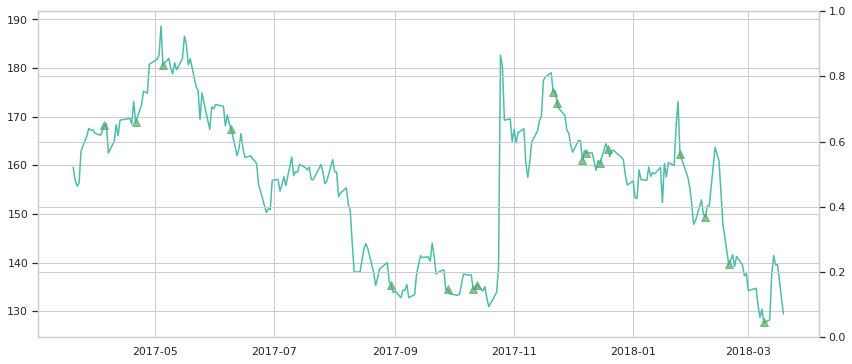

In [ ]:
plot_signals(signals)

Profit and Loss Calculation

In [ ]:
#returns portfolio dataframe which containst the total assets at every time step

def pnl_calculation(signals):

  initial_capital = 100000

  # shares to buy for each position 
  positions1 = initial_capital// max(signals['asset1']) 
  positions2 = initial_capital// max(signals['asset2'])

  #pnl for the 1st asset
  portfolio = pd.DataFrame()
  portfolio['asset1'] = signals['asset1']
  portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
  portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
  portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
  portfolio['return1'] = portfolio['total asset1'].pct_change()
  portfolio['positions1'] = signals['positions1']

  # pnl for the 2nd asset
  portfolio['asset2'] = signals['asset2']
  portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
  portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
  portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
  portfolio['return2'] = portfolio['total asset2'].pct_change()
  portfolio['positions2'] = signals['positions2']

  # total pnl and z-score
  portfolio['z'] = signals['z']
  portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
  portfolio['z upper limit'] = signals['z upper limit']
  portfolio['z lower limit'] = signals['z lower limit']
  portfolio = portfolio.dropna()

  return portfolio

In [ ]:
portfolio=pnl_calculation(signals)
portfolio.head()

,asset1,holdings1,cash1,total asset1,return1,positions1,asset2,holdings2,cash2,total asset2,return2,positions2,z,total asset,z upper limit,z lower limit
Date,,,,,,,,,,,,,,,,
2017-03-22,155.749069,0.0,100000.0,100000.0,0.0,0.0,96.357178,0.0,100000.0,100000.0,0.0,0.0,-0.911361,200000.0,1.0,-1.0
2017-03-23,156.327316,0.0,100000.0,100000.0,0.0,0.0,95.754723,0.0,100000.0,100000.0,0.0,0.0,-0.796859,200000.0,1.0,-1.0
2017-03-24,162.929306,0.0,100000.0,100000.0,0.0,0.0,97.160431,0.0,100000.0,100000.0,0.0,0.0,-0.483701,200000.0,1.0,-1.0
2017-03-27,166.061646,0.0,100000.0,100000.0,0.0,0.0,95.152283,0.0,100000.0,100000.0,0.0,0.0,-0.001137,200000.0,1.0,-1.0
2017-03-28,167.603699,0.0,100000.0,100000.0,0.0,0.0,96.658386,0.0,100000.0,100000.0,0.0,0.0,-0.080539,200000.0,1.0,-1.0


In [ ]:
# plots total asset value at each time step
def plot_portfolio_value(portfolio):
  
  # plot the asset value change of the portfolio and pnl along with z-score
  fig = plt.figure(figsize=(14,6),)
  ax = fig.add_subplot(111)
  ax2 = ax.twinx()
  l1, = ax.plot(portfolio['total asset'], c='g')
  l2, = ax2.plot(portfolio['z'], c='black', alpha=0.3)
  b = ax2.fill_between(portfolio.index,portfolio['z upper limit'], portfolio['z lower limit'], alpha=0.2,color='#ffb48f')
  ax.set_ylabel('Asset Value')
  ax2.set_ylabel('Z Statistics',rotation=270)
  ax.yaxis.labelpad=15
  ax2.yaxis.labelpad=15
  ax.set_xlabel('Date')
  ax.xaxis.labelpad=15
  plt.title('Portfolio Performance with Profit and Loss')
  plt.legend([l2,b,l1],['Z Statistics', 'z Score between upper limit and lower limit','Total Portfolio Value'],loc='upper left');

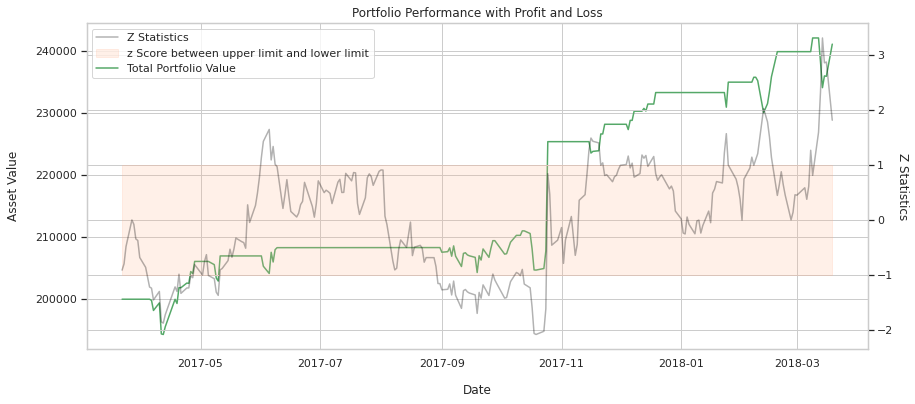

In [ ]:
plot_portfolio_value(portfolio)

In [ ]:
def calculate_cagr(portfolio):

  # calculate CAGR
  final_portfolio = portfolio['total asset'].iloc[-1]
  initial_portfolio = portfolio['total asset'].iloc[0]
  delta = (portfolio.index[-1] - portfolio.index[0]).days
  print('Number of days = ', delta)
  YEAR_DAYS = 365
  returns = (final_portfolio/initial_portfolio) ** (YEAR_DAYS/delta) - 1
  return returns

In [ ]:
print('CAGR = {:.3f}%' .format(calculate_cagr(portfolio) * 100))

Number of days =  362
CAGR = 20.750%


# Backtesting on US Markets

In [ ]:
symbols_us = ['ABT', 'AJG', 'NVDA', 'TSM', 'ASML', 'ORCL', 'CSCO', 'ACN']


df =  yf.download(symbols_us, start="2013-03-20" ,end= "2017-03-20")['Adj Close']
df.head()

[*********************100%***********************]  8 of 8 completed


,ABT,ACN,AJG,ASML,CSCO,NVDA,ORCL,TSM
Date,,,,,,,,
2013-03-20,28.093697,63.713551,31.969835,63.271290,15.980916,2.932067,30.862747,12.837465
2013-03-21,27.819494,61.889385,31.922224,62.593094,15.368818,2.885600,27.868807,12.569551
2013-03-22,27.993998,61.539516,32.136463,61.779263,15.302441,2.899540,27.592705,12.703505
2013-03-25,28.085390,61.148022,32.096798,62.104782,15.376193,2.883276,26.962851,12.614203
2013-03-26,28.542398,62.089275,32.311039,60.549461,15.376193,2.904187,27.213070,12.703505


In [ ]:
scores_us, pvalues_us, pairs_us = find_cointegrated_pairs(df)
               

In [ ]:
pairs_us

[(0.04671969814201599, ('AJG', 'ASML')),
 (0.002583788549778051, ('ASML', 'AJG')),
 (0.024283934483856417, ('ASML', 'CSCO')),
 (0.012349797635027292, ('CSCO', 'TSM')),
 (0.017802001003812035, ('TSM', 'CSCO'))]

In [ ]:
min(pairs_us)

(0.002583788549778051, ('ASML', 'AJG'))

[*********************100%***********************]  8 of 8 completed


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


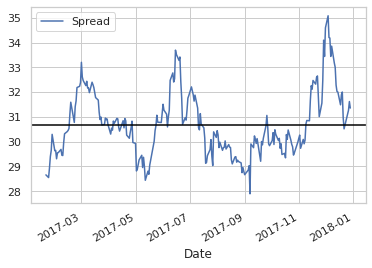

In [ ]:
symbols_pairs_us =  ['ASML', 'AJG']
asset_pairs_us =  yf.download(symbols_us, start="2017-01-20" ,end= "2017-12-31")['Adj Close']

S1_us=asset_pairs_us['ASML']
S2_us=asset_pairs_us['AJG']

S1_us = sm.add_constant(S1_us)
results = sm.OLS(S2_us, S1_us).fit()
S1_us = S1_us['ASML']
b = results.params['ASML']

spread = S2_us - b * S1_us
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

In [ ]:
signals_us = signal_pairs(S1_us,S2_us)

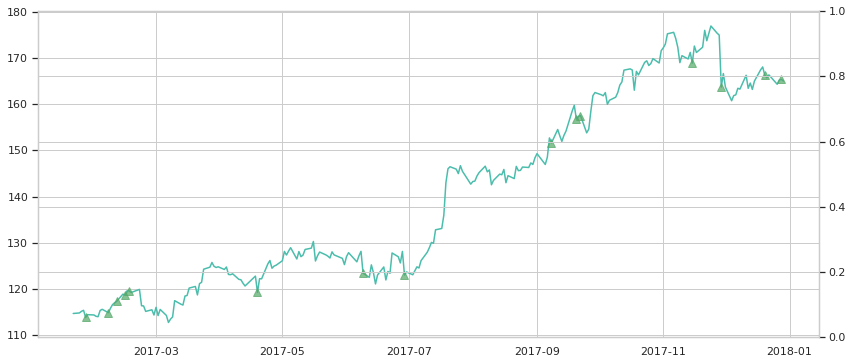

In [ ]:
plot_signals(signals_us)

In [ ]:
portfolio_us=pnl_calculation(signals_us)
portfolio_us.head()

,asset1,holdings1,cash1,total asset1,return1,positions1,asset2,holdings2,cash2,total asset2,return2,positions2,z,total asset,z upper limit,z lower limit
Date,,,,,,,,,,,,,,,,
2017-01-24,115.197304,0.000000,100000.000000,100000.000000,0.000000,0.0,47.619633,0.000000,100000.000000,100000.000000,0.000000,0.0,-0.866238,200000.000000,1.0,-1.0
2017-01-25,115.413506,0.000000,100000.000000,100000.000000,0.000000,0.0,48.120609,0.000000,100000.000000,100000.000000,0.000000,0.0,-0.959282,200000.000000,1.0,-1.0
2017-01-26,113.862473,64332.296982,35667.703018,100000.000000,0.000000,1.0,48.120609,-78677.196178,178677.196178,100000.000000,0.000000,-1.0,-1.104218,200000.000000,1.0,-1.0
2017-01-27,114.464104,64672.218590,35667.703018,100339.921608,0.003399,0.0,48.863129,-79891.215363,178677.196178,98785.980816,-0.012140,0.0,-1.210535,199125.902424,1.0,-1.0
2017-01-30,114.407707,64640.354576,35667.703018,100308.057594,-0.000318,0.0,48.192184,-78794.221573,178677.196178,99882.974606,0.011105,0.0,-1.069147,200191.032200,1.0,-1.0


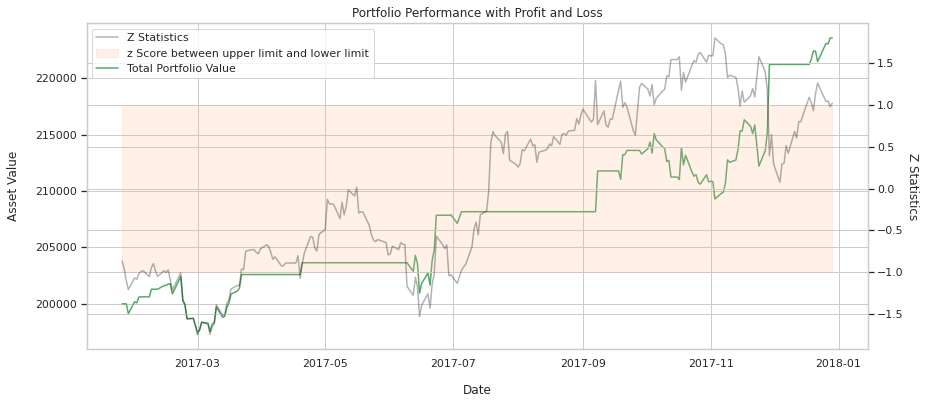

In [ ]:
plot_portfolio_value(portfolio_us)

In [ ]:
print('CAGR = {:.3f}%' .format(calculate_cagr(portfolio_us) * 100))

Number of days =  339
CAGR = 12.737%


# Alternate Strategy

A strategy based on Volumes of stocks whose prices are form a Cointegrated Series.

Based on very Rudimentary concepts of volume and price action where we assume volumes are mean reverting.

As volume increases we assume that prices must go up to drive down volume and as volume decreases prices go down to drive up volume.

Using a better metric for the correlation of price and volume is surely bound to increase the CAGR through this strategy and also reduce Drawdown.

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


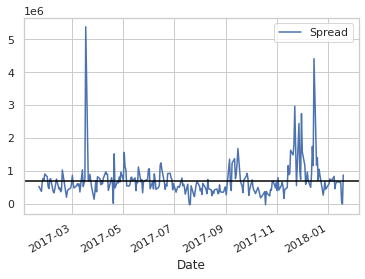

In [ ]:
symbols_pairs_us =  ['ASML', 'AJG']
asset_pairs_us =  yf.download(symbols_us, start="2017-01-20" ,end= "2018-01-20")['Volume']
price_1 =  yf.download(symbols_pairs_us[0], start="2017-01-20" ,end= "2018-01-20")['Adj Close']
price_2 =  yf.download(symbols_pairs_us[1], start="2017-01-20" ,end= "2018-01-20")['Adj Close']
S1_us=asset_pairs_us['ASML']
S2_us=asset_pairs_us['AJG']

S1_us = sm.add_constant(S1_us)
results = sm.OLS(S2_us, S1_us).fit()
S1_us = S1_us['ASML']
b = results.params['ASML']

spread = S2_us - b * S1_us
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

In [ ]:
#Dataframe for trading signals
def signal_pairs_vol(x,y):
  signals = pd.DataFrame()
  signals['asset1'] = x 
  signals['asset2'] = y

  #Calculating Z score of spread and defining upper and lower threshhold
  ratio = signals['asset1']/signals['asset2']
  signals['z'] = zscore(ratio)
  signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
  signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])
  signals['signals1'] = 0
  signals['signals1'] = np.select([signals['z'] >signals['z upper limit'], signals['z'] < signals['z lower limit']], [1, -1], default=0)

  signals['positions1'] = signals['signals1'].diff()
  signals['signals2'] = -signals['signals1']
  signals['positions2'] = signals['signals2'].diff()

  return signals


In [ ]:
signals_us_vol = signal_pairs_vol(S1_us,S2_us)
signals_us_vol['asset1'] = price_1
signals_us_vol['asset2'] = price_2
signals_us_vol

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
Date,,,,,,,,,
2017-01-20,114.727303,47.270737,-0.021075,1.0,-1.0,0,NaN,0,NaN
2017-01-23,114.840096,47.181278,1.324656,1.0,-1.0,1,1.0,-1,-1.0
2017-01-24,115.197311,47.619629,-0.028375,1.0,-1.0,0,-1.0,0,1.0
2017-01-25,115.413498,48.120605,-0.539837,1.0,-1.0,0,0.0,0,0.0
2017-01-26,113.862495,48.120605,-0.535208,1.0,-1.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
2018-01-12,171.706223,58.674282,-0.363351,1.0,-1.0,0,0.0,0,0.0
2018-01-16,176.937073,58.251766,0.546453,1.0,-1.0,0,0.0,0,0.0
2018-01-17,189.088562,58.830425,3.852743,1.0,-1.0,1,1.0,-1,-1.0


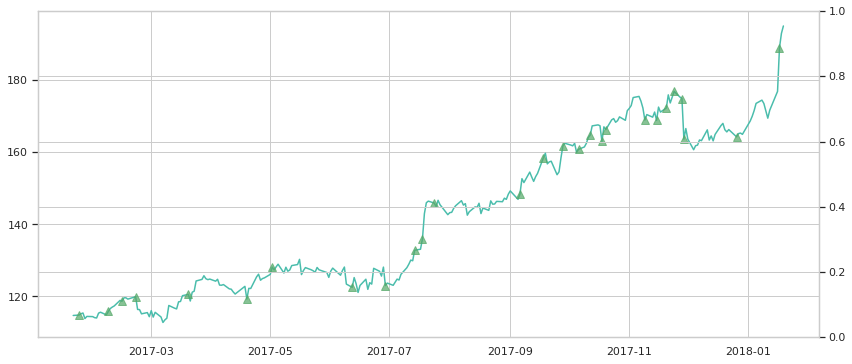

In [ ]:
plot_signals(signals_us_vol)

In [ ]:
portfolio_us_vol=pnl_calculation(signals_us_vol)
portfolio_us_vol.tail()

,asset1,holdings1,cash1,total asset1,return1,positions1,asset2,holdings2,cash2,total asset2,return2,positions2,z,total asset,z upper limit,z lower limit
Date,,,,,,,,,,,,,,,,
2018-01-12,171.706223,0.000000,110679.355469,110679.355469,0.000000,0.0,58.674282,0.000000,93749.872208,93749.872208,0.000000,0.0,-0.363351,204429.227676,1.0,-1.0
2018-01-16,176.937073,0.000000,110679.355469,110679.355469,0.000000,0.0,58.251766,0.000000,93749.872208,93749.872208,0.000000,0.0,0.546453,204429.227676,1.0,-1.0
2018-01-17,189.088562,96813.343750,13866.011719,110679.355469,0.000000,1.0,58.830425,-96187.745304,189937.617512,93749.872208,0.000000,-1.0,3.852743,204429.227676,1.0,-1.0
2018-01-18,193.056808,98845.085938,13866.011719,112711.097656,0.018357,0.0,58.812061,-96157.720242,189937.617512,93779.897270,0.000320,0.0,4.440648,206490.994926,1.0,-1.0
2018-01-19,195.107376,0.000000,113760.988281,113760.988281,0.009315,-1.0,59.050858,0.000000,93389.465427,93389.465427,-0.004163,1.0,-0.171911,207150.453709,1.0,-1.0


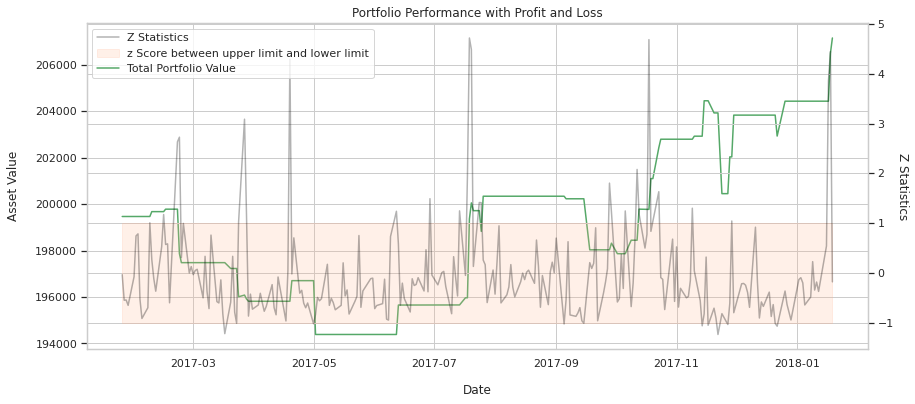

In [ ]:
plot_portfolio_value(portfolio_us_vol)

In [ ]:
print('CAGR = {:.3f}%' .format(calculate_cagr(portfolio_us_vol) * 100))

Number of days =  360
CAGR = 3.907%
